<a href="https://colab.research.google.com/github/Ezzeldin-nasser939/Accident_detection_CNN_model/blob/main/Accident_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Dense, Dropout,Flatten ,Bidirectional ,GlobalAveragePooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
indices = np.random.permutation(50)[0:3]
indices

array([ 7, 17, 12])

In [ ]:
Accident_x = np.load('/content/drive/MyDrive/Zezo_new/Acident_Data.npy')
Accident_y = np.ones((50,1))

NonAccident_x = np.load('/content/drive/MyDrive/Zezo_new/Non-Acident_Data.npy')
NonAccident_y = np.zeros((50,1))

In [ ]:
print("The shape of the accident feature maps :",Accident_x.shape)
print("The shape of the accident labels :",Accident_y.shape)
print("The shape of the non-accident feature maps :",NonAccident_x.shape)
print("The shape of the non-accident labels :",NonAccident_y.shape)

The shape of the accident feature maps : (50, 100, 8, 8, 2048)
The shape of the accident labels : (50, 1)
The shape of the non-accident feature maps : (50, 100, 8, 8, 2048)
The shape of the non-accident labels : (50, 1)


In [ ]:
Data_x = np.vstack((Accident_x[45:50], NonAccident_x[45:50]))
Data_y = np.vstack((Accident_y[45:50], NonAccident_y[45:50]))
x_val = np.vstack((Accident_x[indices], NonAccident_x[indices]))
y_val = np.vstack((Accident_y[indices], NonAccident_y[indices]))
print("The shape of the all feature maps :",Data_x.shape)
print("The shape of the all labels :",Data_y.shape)
print("The shape of validation feature maps :",x_val.shape)
print("The shape of validation labels :",y_val.shape)

The shape of the all feature maps : (10, 100, 8, 8, 2048)
The shape of the all labels : (10, 1)
The shape of validation feature maps : (6, 100, 8, 8, 2048)
The shape of validation labels : (6, 1)


In [ ]:
# Data_x = np.vstack((Accident_x, NonAccident_x))
# Data_y = np.vstack((Accident_y, NonAccident_y))

# print("The shape of the all feature maps :",Data_x.shape)
# print("The shape of the all labels :",Data_y.shape)

In [ ]:
import random
import numpy as np

temp = list(zip(Data_x, Data_y))
random.shuffle(temp)
Data_x, Data_y = zip(*temp)
Data_x, Data_y = np.array(Data_x),  np.array(Data_y)
temp = list(zip(x_val, y_val))
random.shuffle(temp)
x_val, y_val = zip(*temp)
x_val, y_val = np.array(x_val),  np.array(y_val)

In [ ]:
print("The shape of the all feature maps :",Data_x.shape)
print("The shape of the all labels :",Data_y.shape)
print("The shape of validation feature maps :",x_val.shape)
print("The shape of validation labels :",y_val.shape)

The shape of the all feature maps : (10, 100, 8, 8, 2048)
The shape of the all labels : (10, 1)
The shape of validation feature maps : (6, 100, 8, 8, 2048)
The shape of validation labels : (6, 1)


In [ ]:
# indices = np.random.permutation(Data_x.shape[0])

# shuffled_Data_x = Data_x[indices]
# shuffled_Data_y = Data_x[indices]

# print("The shape of the all feature maps :",shuffled_Data_x.shape)
# print("The shape of the all labels :",shuffled_Data_y.shape)

In [ ]:
# x_train, x_val = np.split(shuffled_Data_x, [90], axis=0)
# y_train, y_val = np.split(shuffled_Data_y, [90], axis=0)

# x_train = x_train.astype(np.float16)
# x_val = x_val.astype(np.float16)
# y_train = y_train.astype(np.float16)
# y_val = y_val.astype(np.float16)

# print("The shape of training data :",x_train.shape)
# print("The shape of validation data :",x_val.shape)
# print("The shape of training labels :",y_train.shape)
# print("The shape of validation labels :",y_val.shape)

In [ ]:
# np.save('DATA/X_train.npy', x_train)
# np.save('DATA/X_val.npy', x_val)
# np.save('DATA/y_train.npy', y_train)
# np.save('DATA/y_val_train.npy', y_val)

In [ ]:
# x_train = np.load("DATA/X_train.npy")
# x_val = np.load("DATA/X_val.npy.npy")
# y_train = np.load("DATA/y_train.npy.npy")
# y_val = np.load("DATA/X_val.npy.npy")

In [ ]:
input_shape = (None, 8, 8,2048)

model = Sequential()

model.add(ConvLSTM2D(64, 3,  dropout=0.2, recurrent_dropout=0.2,padding='same', return_sequences=False, input_shape=input_shape, name='ConvLSTM2D_1'))
# Block-2
# model.add(ConvLSTM2D(16, 3, dropout=0.2, recurrent_dropout=0.2,padding='same', return_sequences=True, name='ConvLSTM2D_2'))
# Block-3
# model.add(ConvLSTM2D(32, 3, dropout=0.2, recurrent_dropout=0.2 , return_sequences=False, name='ConvLSTM2D_3'))

model.add(BatchNormalization())

model.add(Flatten())
# model.add(GlobalAveragePooling2D())

model.add(Dense(2048, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))


model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001),loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvLSTM2D_1 (ConvLSTM2D)   (None, 8, 8, 64)          4866304   
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 64)         256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 2048)              8390656   
                                                                 
 dense_1 (Dense)             (None, 32)                65568     
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                        

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# input_shape = (None, 8, 8,2048)

# model = Sequential()

# """model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=True, input_shape=input_shape))

# model.add(BatchNormalization())"""

# model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=False, input_shape=input_shape))

# model.add(BatchNormalization())

# model.add(Flatten())

# """model.add(Dense(400))
# model.add(Dropout(0.3))"""

# """model.add(Dense(100))
# model.add(Dropout(0.3))"""

# model.add(Dense(1))
# model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# model.summary()

In [ ]:
model.load_weights('/content/drive/MyDrive/Conv2.h5')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(Data_x, Data_y, validation_data= (x_val,y_val), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 26s 26s/step - loss: 0.6007 - accuracy: 0.7000 - val_loss: 0.6528 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.6142 - accuracy: 0.8000 - val_loss: 0.6627 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.6506 - accuracy: 0.7000 - val_loss: 0.6713 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.5811 - accuracy: 0.8000 - val_loss: 0.6717 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.5506 - accuracy: 0.9000 - val_loss: 0.6628 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.5421 - accuracy: 0.8000 - val_loss: 0.6588 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.5018 - accuracy: 1.0000 - val_loss: 0.6558 - val_accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 

In [ ]:
model.save("/content/drive/MyDrive/Conv2.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


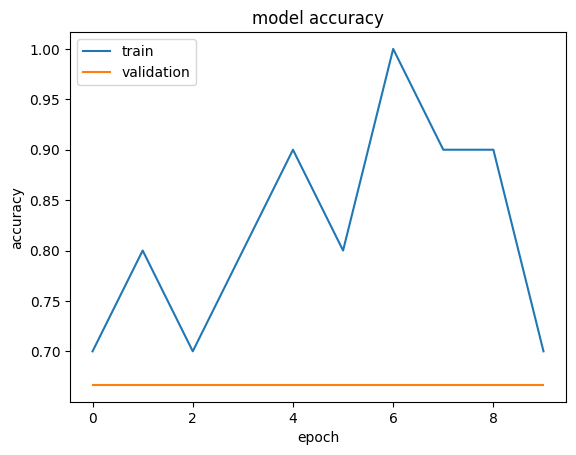

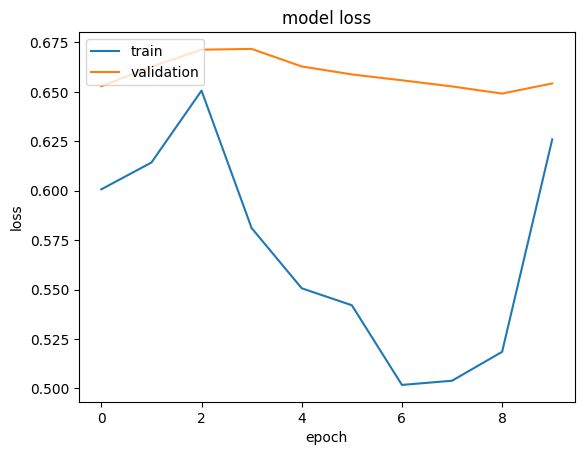

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# history = model.fit(Data_x, Data_y, validation_split=.2, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 [==============================] - 39s 39s/step - loss: 0.6710 - accuracy: 0.5000 - val_loss: 0.6824 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 0.6515 - accuracy: 0.6250 - val_loss: 0.6757 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 6s 6s/step - loss: 0.5800 - accuracy: 0.7500 - val_loss: 0.6740 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 4s 4s/step - loss: 0.7005 - accuracy: 0.5000 - val_loss: 0.6753 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 4s 4s/step - loss: 0.5276 - accuracy: 1.0000 - val_loss: 0.6738 - val_accuracy: 0.5000


In [ ]:
len(history.history['loss'])

10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
